In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

# HR Attrition dataset

The HR Attrition dataset contains the Attrition rate based on various parameters / Variables in a company.

1. This dataset contains 35 variable with 1470 rows.
2. In this dataset, the Attrition is the Dependent varible and rest 34 columns are the Independent variable.

The analysis of Independent variables with respect to Dependent variable is done and the dataset is next prepared for ML to predict Attrition rate.

In [ ]:
# Description of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the dataset description, we can observe following things.

1. The count for all the variables are same and hence we can say that there are no null values present although we shall check for null values separately for confirmation.
2. The min age and max age for work is 18 and 60 which gives the legal age for work and retirement. So, the age column is said to be correct.
3. The minimum and maximum monthly income is around 1000 and 20000 units.
4. The minimum and max hourly rate is around 30 and 100.


In [ ]:
# Verification of null values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

This gives the confirmation that there are no null values for overall dataset.

In [ ]:
# Datatyes for each attributes/variables
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The data types for each varaible is presented and by observation we can say that these data types are said to be correct and no conversion needed.

In [ ]:
# Attrition counts (Employees currently in company)
print(df['Attrition'].value_counts())
print(df['Attrition'].value_counts() / df['Attrition'].value_counts().sum()*100)

No     1233
Yes     237
Name: Attrition, dtype: int64
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


From the value counts of Attrition rate, we can observe that there are around 84% of employees who have left and company and 16% remaining.

In [ ]:
# Attrition rate based on age
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [ ]:
#df.groupby('Age')['Attrition'].values

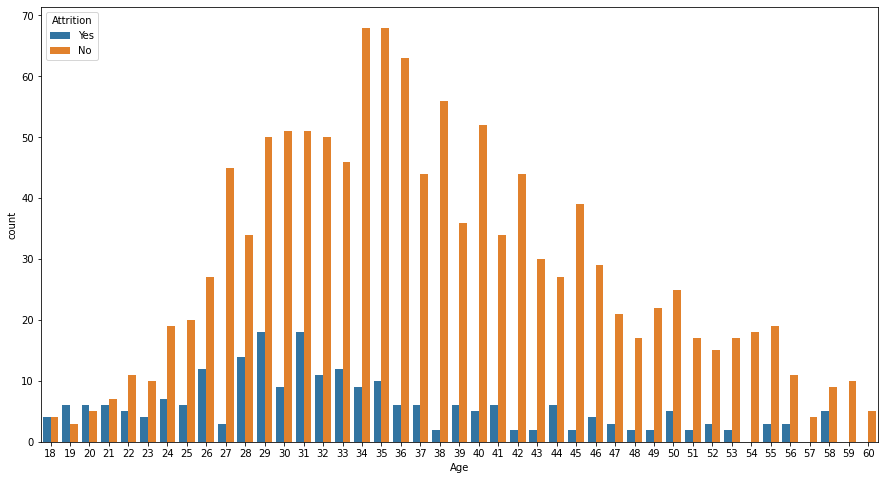

In [ ]:
#sns.countplot(x = 'Age', hue = "smoker", data = df)
#plt.plot(figsize = (10, 15))
plt.subplots(figsize = (15, 8))
sns.countplot(x = 'Age', hue = "Attrition", data = df)
plt.show()

From sns.countplot, we can address two variables in a single bar graph. The above graph indicates the Attrition rate for Age variable. The following observations can be made.

1. The attrition rate "No" (Employees not present in company) is highest for age group of 34 and 35 followed by 36.
2. For age 29 and 31, the attriition rate "Yes" shows highest.
3. Although the attrition rate "Yes" is high for few Age group, apart from age 18-20, the attrition rate "No" is dominating the attrition rate "Yes".

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64
Female with No Attrition:  85.20408163265306 %
Female with Yes Attrition:  14.795918367346939 %
Male with No Attrition:  82.99319727891157 %
Male with Yes Attrition:  17.006802721088434 %
Female Percentage :  40.0 %
Male Percentage :  60.0 %


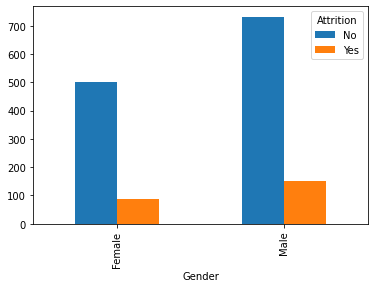

In [ ]:
data = df.groupby(['Gender', 'Attrition'])['Attrition'].count()
data.unstack().plot.bar()

# Percentage calculation
d_f = (df[df['Gender'] == 'Female'].count()[0] / df.shape[0])*100
d_m = (df[df['Gender'] == 'Male'].count()[0] / df.shape[0])*100
print(data)
print('Female with No Attrition: ', data.values[0] / data.values[0:2].sum()*100, '%')
print('Female with Yes Attrition: ', data.values[1] / data.values[0:2].sum()*100, '%')
print('Male with No Attrition: ', data.values[2] / data.values[2:4].sum()*100, '%')
print('Male with Yes Attrition: ', data.values[3] / data.values[2:4].sum()*100, '%')
print('Female Percentage : ',d_f,'%')
print('Male Percentage : ',d_m,'%')
"""
gender = data.values
labels = 'Female', 'Male'
plt.pie(gender, labels = labels, autopct = '%0.f%%')
"""
plt.show()

From the above analysis of Gender and Attrition, we can say that
1. The company have 40% female employees and 60% Male employees.
2. From bar graph, we can observe that out of 40% female strength, 85% Female has Attrition "No" and rest 15% has Attrition "Yes".
3. Similarly, out of 60% Male strength, 83% Male has Attrition "No" and rest 17% has Attrition "Yes".

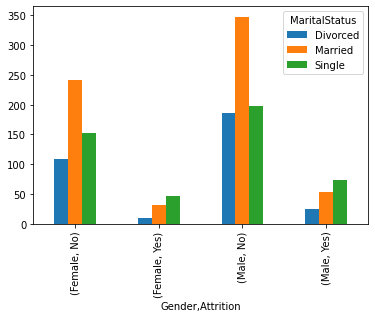

In [ ]:
data = df.groupby(['Gender', 'Attrition', 'MaritalStatus'])['Attrition'].count()
data.unstack().plot.bar()
plt.show()

From the graph, we can observe that:
1. The Attrition rate "No" for both Male and Female Employees is higher for Married status following with Single and Divorced.
2. While, the Attrition rate "Yes" for both Male and Female Employees is higher for Single statur following with Married and Divorced Status.

In [ ]:
for col in df.columns:
  print(str(col) + str(df[col].unique()))

Age[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition['Yes' 'No']
BusinessTravel['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 116

From the unique value analysis, we can observe that the variables "EmployeeCount, Over18, StandartHours" has only 1 unique value and it does not have much influence in the dataset. So, these variables can be removed. Also, Employee Number does not have effect for the Attrition rate.

In [ ]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace=True)

In [ ]:
df.shape

(1470, 31)

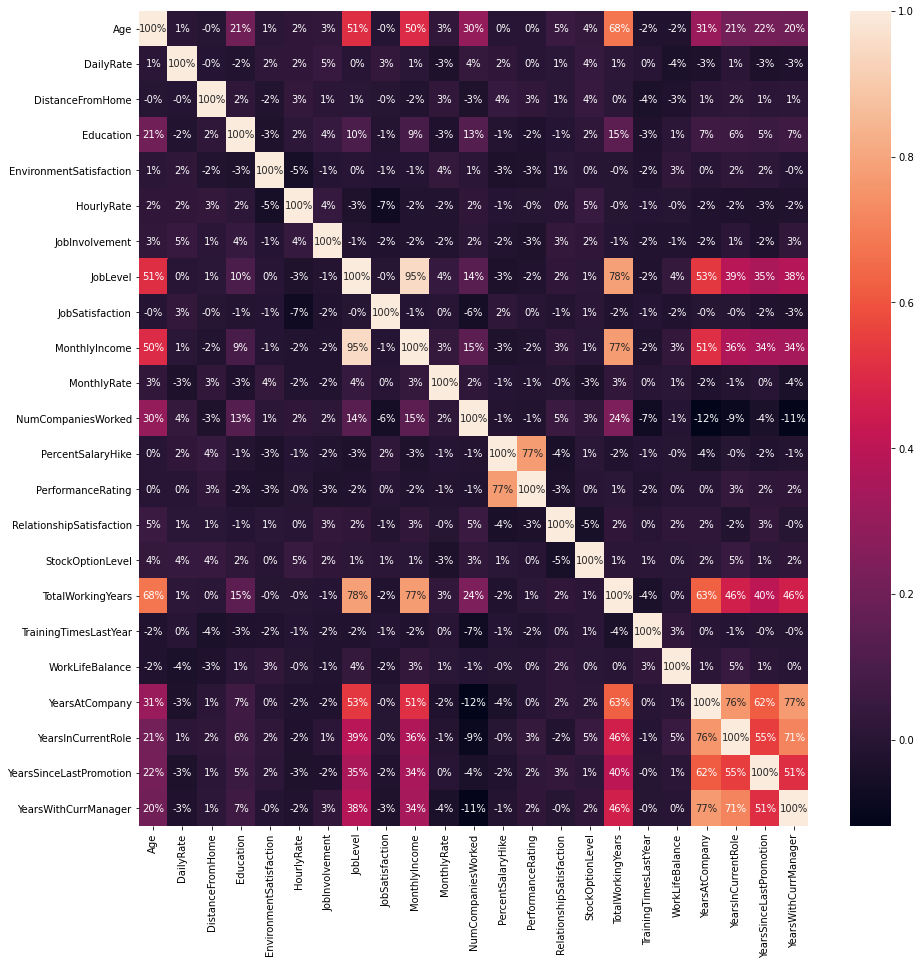

In [ ]:
# Co-relation matrix
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')
plt.show()

From the Dataset Correlation matrix, we can observe following things:

1. The correlation between Job level and YearsAtCompany is at 53% which means as the working years at company increases, there is a chance of 53% increase in Job level.
2. As the Job level increase, there is a chance of 95% increase in Monthly income for the employees.
3. We can observe that there is not much negative corelation between the variables.

# Conclusion

1. The dataset predicts the Attrition rate of the employees.
2. Determination of Attrition rate based on various variables have been done. The age variable have been converted to different age groups and analysed.
3. Analysis have been done using correlation matrix also.
4. Object datatypes have to be converted to Categorical variables for the dataset to be ready for ML.